In [7]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r'sales.csv')


In [ ]:
df.head()


In [ ]:
df.info()

In [ ]:
# Get a summary of missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

In [11]:
# Drop columns with more than 50% missing values (if any)
threshold = len(df) * 0.5
df = df.loc[:, df.isnull().sum() <= threshold]

In [12]:
# Fill missing values for numerical columns with the median
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

In [13]:
# Fill missing values for categorical columns with the mode
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])


In [ ]:
# Verify if there are any remaining missing values
print("Remaining missing values:\n", df.isnull().sum())


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2676 entries, 0 to 9786
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         2676 non-null   int64         
 1   Order ID       2676 non-null   object        
 2   Order Date     2676 non-null   datetime64[ns]
 3   Ship Date      2676 non-null   datetime64[ns]
 4   Ship Mode      2676 non-null   object        
 5   Customer ID    2676 non-null   object        
 6   Customer Name  2676 non-null   object        
 7   Segment        2676 non-null   object        
 8   Country        2676 non-null   object        
 9   City           2676 non-null   object        
 10  State          2676 non-null   object        
 11  Postal Code    2676 non-null   float64       
 12  Region         2676 non-null   object        
 13  Product ID     2676 non-null   object        
 14  Category       2676 non-null   object        
 15  Sub-Category   2676 non-nu

In [16]:
# Convert 'Order Date' and 'Ship Date' columns to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')

In [17]:
# Check for any erroneous dates converted to NaT (Not-a-Time)
print("Number of invalid dates in 'Order Date':", df['Order Date'].isna().sum())
print("Number of invalid dates in 'Ship Date':", df['Ship Date'].isna().sum())

Number of invalid dates in 'Order Date': 5841
Number of invalid dates in 'Ship Date': 5985


In [18]:
# Handle any invalid dates (e.g., drop rows with invalid dates)
df = df.dropna(subset=['Order Date', 'Ship Date'])

In [ ]:
# Convert numerical columns to appropriate types if needed (e.g., 'Postal Code' to string)
df['Postal Code'] = df['Postal Code'].astype(str)

In [19]:
# Check for duplicates
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


In [20]:
# Display the first few rows of the cleaned dataset
print(df.head())

    Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0        1  CA-2017-152156 2017-08-11 2017-11-11    Second Class    CG-12520   
1        2  CA-2017-152156 2017-08-11 2017-11-11    Second Class    CG-12520   
13      14  CA-2017-161389 2017-05-12 2017-10-12  Standard Class    IM-15070   
35      36  CA-2017-117590 2017-08-12 2017-10-12     First Class    GH-14485   
36      37  CA-2017-117590 2017-08-12 2017-10-12     First Class    GH-14485   

   Customer Name    Segment        Country        City       State  \
0    Claire Gute   Consumer  United States   Henderson    Kentucky   
1    Claire Gute   Consumer  United States   Henderson    Kentucky   
13  Irene Maddox   Consumer  United States     Seattle  Washington   
35     Gene Hale  Corporate  United States  Richardson       Texas   
36     Gene Hale  Corporate  United States  Richardson       Texas   

    Postal Code   Region       Product ID         Category Sub-Category  \
0       42420.0    Sout

In [21]:
# Save the cleaned dataset to a new CSV file
df.to_csv('Cleaned_Superstore_Sales_Dataset.csv', index=False)

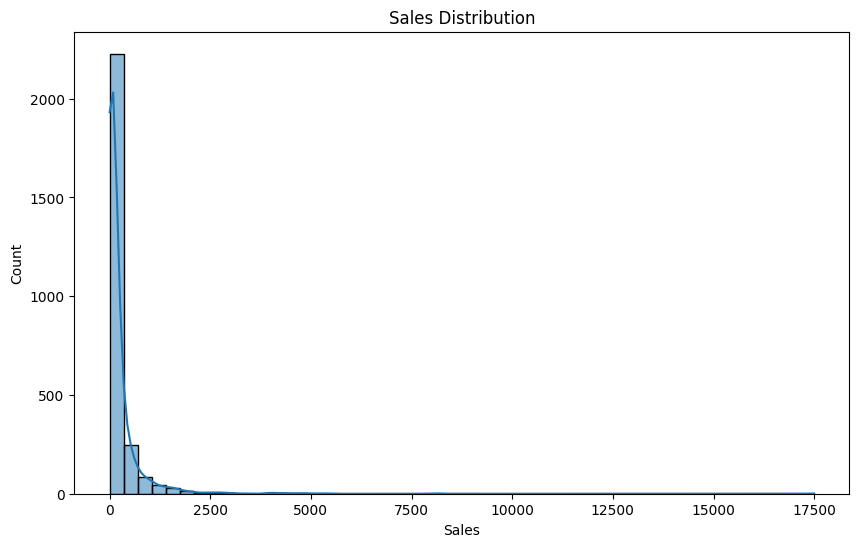

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot sales distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales'], bins=50, kde=True)
plt.title('Sales Distribution')
plt.show()


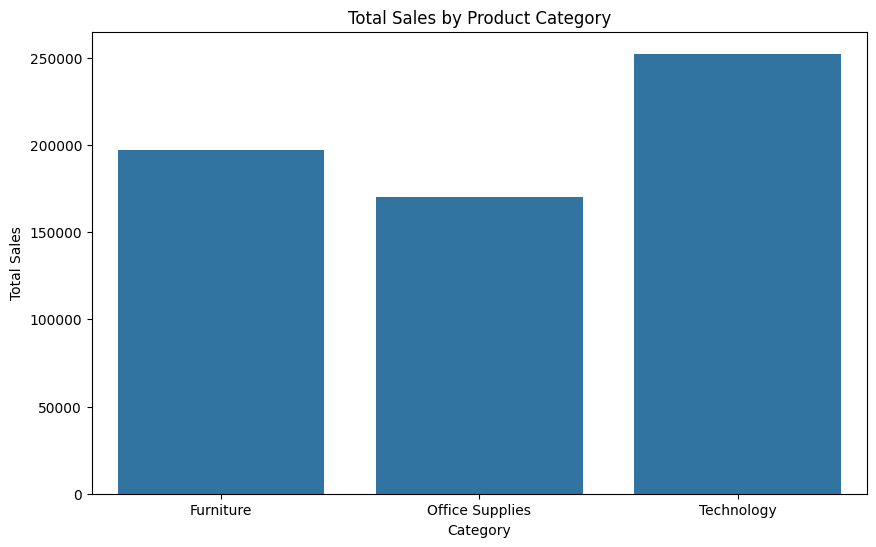

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summarize sales by category
category_sales = df.groupby('Category')['Sales'].sum().reset_index()

# Plot sales by category
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Sales', data=category_sales)
plt.title('Total Sales by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()

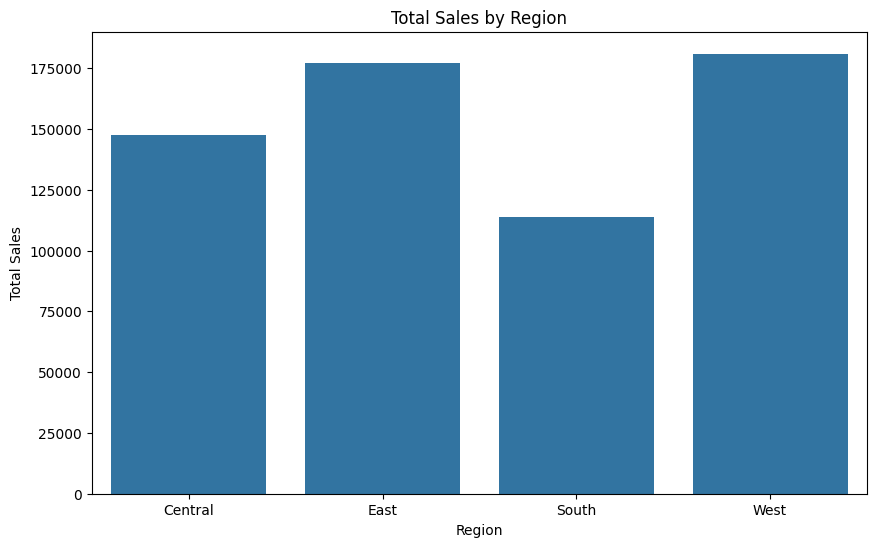

In [27]:
region_sales = df.groupby('Region')['Sales'].sum().reset_index()
# Plot sales by region
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Sales', data=region_sales)
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()


C:\Users\rashm\AppData\Local\Temp\ipykernel_18828\2904187363.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M', on='Order Date')['Sales'].sum().reset_index()


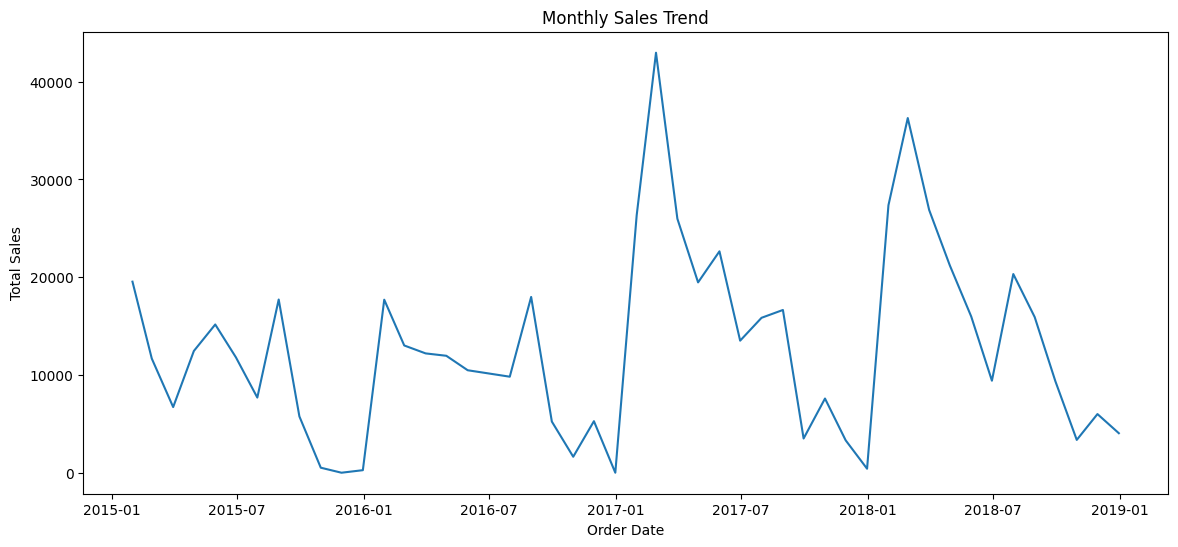

In [29]:
# Ensure 'Order Date' is in datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Resample sales data by month using the 'on' parameter
monthly_sales = df.resample('M', on='Order Date')['Sales'].sum().reset_index()

# Plot monthly sales trend
plt.figure(figsize=(14, 6))
sns.lineplot(x='Order Date', y='Sales', data=monthly_sales)
plt.title('Monthly Sales Trend')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.show()



In [30]:
from fbprophet import Prophet

# Prepare data for Prophet
sales_data = monthly_sales.reset_index()
sales_data.columns = ['ds', 'y']

# Initialize and fit the model
model = Prophet()
model.fit(sales_data)

# Make future predictions
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

# Plot forecast
model.plot(forecast)
plt.title('Sales Forecast')
plt.show()


ModuleNotFoundError: No module named 'fbprophet'